# Opi matematiikkaa ohjelmoimalla digitaalista kuvankäsittelyä, osa 2/2

Pythonissa on monta eri tapaa käsitellä kuvia. Yksi niistä on opencv:n affine transform, jolla kuvia voi operoida lineaarisilla kuvauksilla. 

Koska myös kuvia itsessään voi käsitellä matriiseina (pikseliruudukkona), niihin voi soveltaa matriisien laskusääntöjä. Tässä hyödynnetään yhteen- ja kertolaskua. Lisäksi pikseleitä voi käsitellä yksitellen ja iteroimalla.

Tässä on 8x8 pikselin kuva:
<img src=omena80.png></img>
Sen voi ajatella myös 8x8 matriisina:
<img src=omenamatriisi.png></img>
Tai RGB-arvoina:
\begin{bmatrix}
(255{,}255{,}255)&(255{,}255{,}255)&(255{,}255{,}255)&(255{,}255{,}255)&(255{,}255{,}255)&(100{,}66{,}66)&(255{,}255{,}255)&(255{,}255{,}255)&\\
(255{,}255{,}255)&(255{,}255{,}255)&(255{,}255{,}255)&(255{,}255{,}255)&(100{,}66{,}66)&(255{,}255{,}255)&(255{,}255{,}255)&(255{,}255{,}255)&\\
(255{,}255{,}255)&(160{,}36{,}45)&(228{,}60{,}60)&(228{,}60{,}60)&(100{,}66{,}66)&(228{,}60{,}60)&(228{,}60{,}60)&(255{,}255{,}255)&\\
(91{,}36{,}45)&(160{,}36{,}45)&(228{,}60{,}60)&(228{,}60{,}60)&(228{,}60{,}60)&(228{,}60{,}60)&(225{,}120{,}120)&(228{,}60{,}60)&\\
(91{,}36{,}45)&(160{,}36{,}45)&(228{,}60{,}60)&(228{,}60{,}60)&(228{,}60{,}60)&(225{,}120{,}120)&(255{,}255{,}255)&(228{,}60{,}60)&\\
(91{,}36{,}45)&(160{,}36{,}45)&(228{,}60{,}60)&(228{,}60{,}60)&(228{,}60{,}60)&(228{,}60{,}60)&(228{,}60{,}60)&(228{,}60{,}60)&\\
(91{,}36{,}45)&(91{,}36{,}45)&(160{,}36{,}45)&(160{,}36{,}45)&(160{,}36{,}45)&(160{,}36{,}45)&(160{,}36{,}45)&(160{,}36{,}45)&\\
(255{,}255{,}255)&(91{,}36{,}45)&(91{,}36{,}45)&(91{,}36{,}45)&(91{,}36{,}45)&(91{,}36{,}45)&(91{,}36{,}45)&(255{,}255{,}255)
\end{bmatrix}

Tai kolmena eri matriisina, jotka kuvaavat eri RGB-väriarvot:

R:
\begin{bmatrix}
255&255&255&255&255&100&255&255\\
255&255&255&255&100&255&255&255\\
255&160&228&228&100&228&228&255\\
91&160&228&228&228&228&225&228\\
91&160&228&228&228&225&255&228\\
91&160&228&228&228&228&228&228\\
91&91&160&160&160&160&160&160\\
255&91&91&91&91&91&91&255
\end{bmatrix}
B:
\begin{bmatrix}
255&255&255&255&255&66&255&255\\
255&255&255&255&66&255&255&255\\
255&36&60&60&66&60&60&255\\
36&36&60&60&60&60&120&60\\
36&36&60&60&60&120&255&60\\
36&36&60&60&60&60&60&60\\
36&36&36&36&36&36&36&36\\
255&36&36&36&36&36&36&255
\end{bmatrix}

G:
\begin{bmatrix}
255&255&255&255&255&66&255&255\\
255&255&255&255&66&255&255&255\\
255&45&60&60&66&60&60&255\\
45&45&60&60&60&60&120&60\\
45&45&60&60&60&120&255&60\\
45&45&60&60&60&60&60&60\\
45&45&45&45&45&45&45&45\\
255&45&45&45&45&45&45&255
\end{bmatrix}

Näissä matriiseissa on esitetty kuvan jokaisen pikselin RGB-arvot, mutta ei pikselin xy-koordinaatteja eli sijaintia valokuvan tulosteessa. Tämä huomioidaan OpenCV-python kirjaston warpAffine-funktiossa.

### Kuvan lukeminen ja tulostamien

Huomaa, että kuvan origo on vasemmassa yläkulmassa. Kuvassa x-akseli on vaaka-akseli, ja y-akseli on pystyakseli. Alla olevasta kuvasta numeroinnista näet akselien positiiviset suunnat.
- otetaan käyttöön Kirjastot numpy ja cv2

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

kuppi = plt.imread('kuppi_2048.png')

In [17]:
height, width, channels = kuppi.shape

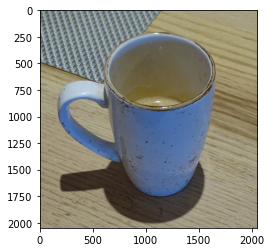

In [18]:
plt.imshow(kuppi)

Käytetään esimerkkikuvana 2048x2048 kuvaa kahvikupista. Origo on tässä vasemmassa yläkulmassa. Tämä täytyy ottaa huomioon lineaarisia kuvauksia käytettäessä. Nyt väriarvoina käytetään desimaalilukuja 0 - 1, jossa 0 on musta ja 1 valkoinen.

Kääntäjän punaisella antama virheilmoistus kertoo, että luvulla 2 kertominen on joidenkin pikselien kohdalla ylittänyt arvon 1. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


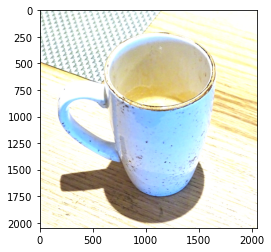

In [21]:
kuppi = plt.imread('kuppi_2048.png')
plt.imshow(
    2 * kuppi
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


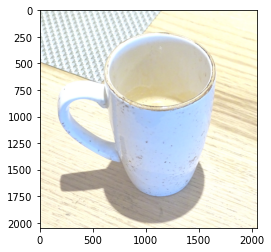

In [22]:
kuppi = plt.imread('kuppi_2048.png')
plt.imshow(
    kuppi + 0.4
)

Kuvia voi myös laskea yhteen matriisien yhteenlaskulla. 

$$\begin{bmatrix} a&b\\c&d\end{bmatrix}+\begin{bmatrix} w&x\\y&z\end{bmatrix}=\begin{bmatrix} a+w&b+x\\c+y&d+z\end{bmatrix}$$

In [23]:
omenat = plt.imread('omenoita.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


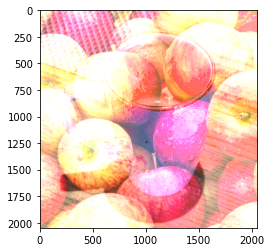

In [24]:
plt.imshow(
    (kuppi + omenat)
)

Keskiarvon laskeminen on mielekkäämpää, jolloin värien arvot eivät ylitä suurinta mahdollista arvoa 1.0.

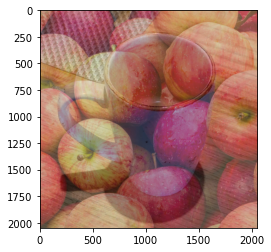

In [25]:
plt.imshow(
    (kuppi + omenat) / 2
)

### Valmiiden kirjastojen käyttö valokuvan kierrossa keskipisteen suhteen

- getRotationMatrix2D funktion käyttöä
- Huomaa, että Opencv:ssä kiertomatriisi M on 2x3 matriisi
- Koodissa ensin muodostetaan muunnosmatiisi M ja sen jälkeen operoidaan tämä kierto alkuperäiselle valokuvalle.

2048
2048
[[ 7.07106781e-01 -7.07106781e-01  1.02400000e+03]
 [ 7.07106781e-01  7.07106781e-01 -4.24154688e+02]]


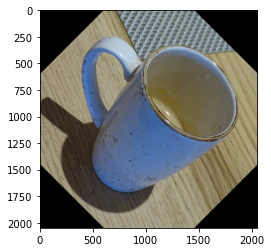

In [26]:
#Opencv warpAffine ja getRotationMatrix2D funktioiden käyttö kuvan kierrossa kuvan keskipisteen suhteen
# valitse kulma
img = plt.imread('kuppi_2048.png')
angle = -45
print(height)
print(width)

#Muunnosmatriisin M laskeminen, kierto keskipisteen suhteen
M = cv2.getRotationMatrix2D((height/2,width/2),angle,1)
print(M)
#Suoritetaan affiinimuunnos kuvalle img matriisilla M, muunnetun kuvan leveys ja korkeus parametreina
result_img = cv2.warpAffine(img, M, (width, height))

# Kuvan piirto
plt.imshow(result_img)

### 2D Siirto eli translaatio T

3x3 Siirtomatriisi matematiikassa
$$
T=\left[\begin{matrix}
1&0&t_x\\
0&1&t_y\\
0&0&1
\end{matrix}\right]
$$

1/4-siirtomatriisin toteutus OpencV 2x3 matriisina T:

$$
T=\left[\begin{matrix}
1&0&x/4\\
0&1&y/4
\end{matrix}\right]
$$

missä x= width = kuvan leveys ja y = height eli kuvan korkeus

## 2D Affiinimuunnos = Translaatio + Lineearinen muunnos 
### 1/4-siirto eli translaatio T ja 0.5-skaalaus S matematiikassa

3x3 Siirtomatriisi ja skaalausmatriisi matematiikassa
$$
T=\left[\begin{matrix}
1&0&t_x\\
0&1&t_y\\
0&0&1
\end{matrix}\right] 
$$
ja
$$
S=\left[\begin{matrix}
s&0&0\\
0&s&0\\
0&0&1
\end{matrix}\right]
$$
eli T ja S molemmat yhdessä:
$$
M=\left[\begin{matrix}
s&0&t_x\\
0&s&t_y\\
0&0&1
\end{matrix}\right] 
$$

### 1/4-siirtomatriisin  ja skaalausmatriisin (s=0.5) toteutus OpencV 2x3 matriisina M:

$$
M=\left[\begin{matrix}
0.5&0&x/4\\
0&0.5&y/4
\end{matrix}\right]
$$

missä x= width = kuvan leveys ja y = height eli kuvan korkeus

[[  1.   0. 512.]
 [  0.   1. 512.]]


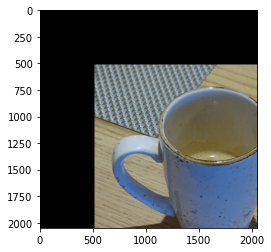

In [32]:
# Kuvan 3x2-siirtomatriisi T , 1/4 siirto, jolloin osa kuvasta siirtyy ulos  alkuperäisestä width,height-avaruudesta
T = np.float32(np.array([[1, 0, width/4],[0, 1, height/4]]))
print(T)


#Affiinimuunnos eli suoritetaan kuvan siirto
result_img = cv2.warpAffine(img, T, (height ,width))

plt.imshow(result_img)

[[  1.   0. 512.]
 [  0.   1. 512.]]


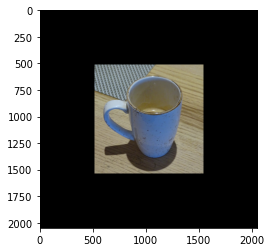

In [33]:
# Kuva skaalaus ja siirto, kuva pysyy alkuperäisessä kuva-avaruudessa 
#Skaalauskerroin
scale = 0.5

# Kuvan skaalaus ja 3x2-siirtomatriisi
M = np.float32(np.array([[scale, 0, width/4],[0, scale, height/4]]))


print(T)

#Suoritetaan Affiinimuunnos T
result_img = cv2.warpAffine(img, M, (height ,width))

plt.imshow(result_img)

## 2D Affiinimuunnos = skaalaus, kierto ja translaatio
### 1/4-siirto eli translaatio T ja 0.5-skaalaus S sekä kierto  matematiikassa

3x3 Siirtomatriisi ja skaalausmatriisi matematiikassa
$$
T=\left[\begin{matrix}
1&0&t_x\\
0&1&t_y\\
0&0&1
\end{matrix}\right] 
$$
ja
$$
S=\left[\begin{matrix}
s&0&0\\
0&s&0\\
0&0&1
\end{matrix}\right]
$$
kierto
$$
R=\left[\begin{matrix}
\cos\left(\alpha\right)&-\sin\left(\alpha\right)&0\\
\sin\left(\alpha\right)&\cos\left(\alpha\right)&0\\
0&0&1
\end{matrix}\right]
$$

### 1/4-siirtomatriisin , skaalausmatriisin (s=0.5)  kierron R toteutus OpencV 2x3 matriisina M:

Alla olevassa koodissa muuonnosmatriisi T on muodostettu siten, että T:n 2 ensimmäistä pystyriviä suorittavat skaalauksen ja kierron alkuperäisen origon (vasen yläkulma) suhteen. Voit testata tätä laittamalla T:n 3.pystyvektorin kertoimien arvoksi nolla. Tämän jälkeen skaalatun ja kierretyn kuvan keskipiste siirretään takaisin alkuperäisen kuvan keskipisteeseen, mikä on T:n 3.pystyrivi.

5.551115123125783e-17 0.7071067811865475


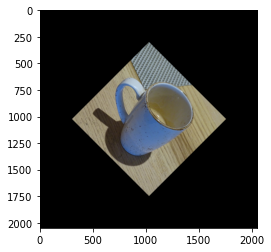

In [36]:
angle = 45*np.pi/180
scale = 0.5
a = scale*np.cos(angle)
b = scale*np.sin(angle)

print(a-b, a+b)

T = np.float32(np.array([[a, -b, width/2*(1-(a-b))],
                         [b,  a, height/2*(1-(a+b))]]))
result_img = cv2.warpAffine(img, T, (height ,width))

plt.imshow(result_img)

## Iteroiminen

Koodissa käydään silmukoilla jokainen pikseli erikseen läpi ja 2-kertaistaan R-kanvan väriarvo. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


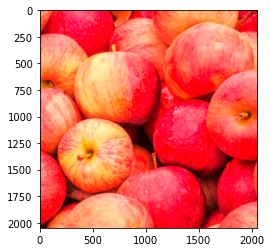

In [37]:
for y in range(height):
    for x in range(width):
        r = omenat[y][x][0]
        g = omenat[y][x][1]
        b = omenat[y][x][2]
        omenat[y][x] = (r * 2, g, b)
plt.imshow(omenat)

## Mustavalkokuvat

Värikuvan voi muuttaa mustavalkokuvaksi muuttamalla matriisin muotoa. Yksinkertainen kaksiulotteinen matriisi on mustavalkokuva. Tälläisessä matriisissa pikseliä kuvaa vain yksi luku, sen kirkkaus. Kirkkauden voi laskea, kun tiedetään rgb-arvot.

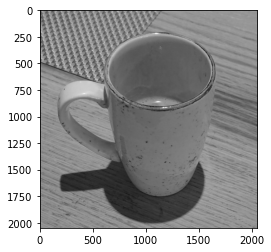

In [39]:
kuppi = plt.imread('kuppi_2048.png')

for y in range(height):
    for x in range(width):
        r = kuppi[y][x][0]
        g = kuppi[y][x][1]
        b = kuppi[y][x][2]
        kuppi[y][x] = 0.333 * r + 0.333 * g + 0.333 * b
plt.imshow(kuppi)

Yleensä pelkkä keskiarvon laskeminen ei riitä realistisen kuvan tuottamiseen. Tämän takia käytetään gammakorjattuja kertoimia:

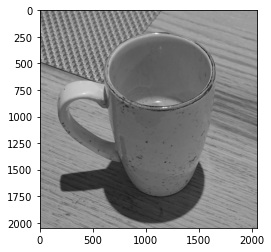

In [40]:
kuppi = plt.imread('kuppi_2048.png')

for y in range(height):
    for x in range(width):
        r = kuppi[y][x][0]
        g = kuppi[y][x][1]
        b = kuppi[y][x][2]
        kuppi[y][x] = 0.299 * r + 0.587 * g + 0.114 * b
plt.imshow(kuppi)

Kertoimien taustalla on ihmisnäön herkkyys eri väreille.